# Unsupervised Learning
Pada bagian ini, digunakan dataset yang tidak terlalu kompleks. Terdapat 2 metode clustering dan 1 reduksi data dengan PCA. Evaluasi dilakukan dengan membandingkan hasil dengan model sklearn

## About the Dataset
The data description is as follows:

- **country**: Name of the country
- **child_mort**: Death of children under 5 years of age per 1000 live births
- **exports**: Exports of goods and services per capita. Given as %age of the GDP per capita
- **health**: Total health spending per capita. Given as %age of GDP per capita
- **imports**: Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income**: Net income per person
- **Inflation**: The measurement of the annual growth rate of the Total GDP
- **life_expec**: The average number of years a new born child would live if the current mortality patterns are to remain the same
- **total_fer**: The number of children that would be born to each woman if the current age-fertility rates remain the same.
- **gdpp**: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Importing the Dataset
data = pd.read_csv("../dataset/dataset2.csv")

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Display a brief description of the overall dataset
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Display complete information of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Modelling

### 1. K-Means Cluster
##### Model from Scratch

In [47]:
from unsupervised_learning.KMeans import KMeans
model = KMeans(5, 100)
model.predict(data.values)

array([3., 2., 2., 3., 1., 1., 3., 0., 0., 2., 1., 1., 3., 1., 2., 0., 2.,
       3., 3., 3., 2., 2., 2., 4., 2., 3., 3., 3., 3., 0., 3., 3., 3., 1.,
       2., 2., 3., 3., 3., 2., 3., 1., 0., 1., 0., 2., 2., 2., 3., 1., 3.,
       1., 3., 0., 0., 2., 3., 3., 0., 3., 1., 2., 3., 3., 3., 3., 3., 1.,
       0., 3., 2., 2., 2., 0., 0., 0., 2., 0., 2., 1., 3., 3., 4., 3., 3.,
       1., 2., 3., 3., 1., 1., 4., 2., 3., 3., 1., 2., 3., 1., 3., 2., 3.,
       3., 3., 2., 3., 3., 3., 2., 3., 0., 0., 3., 3., 4., 0., 3., 2., 3.,
       2., 3., 1., 1., 4., 2., 1., 3., 3., 0., 3., 2., 1., 3., 4., 1., 1.,
       3., 2., 1., 0., 2., 2., 3., 2., 0., 4., 3., 3., 2., 3., 3., 3., 2.,
       1., 2., 3., 3., 0., 0., 0., 1., 3., 3., 1., 3., 3., 3.])

Visualization purpose : only use 2 features

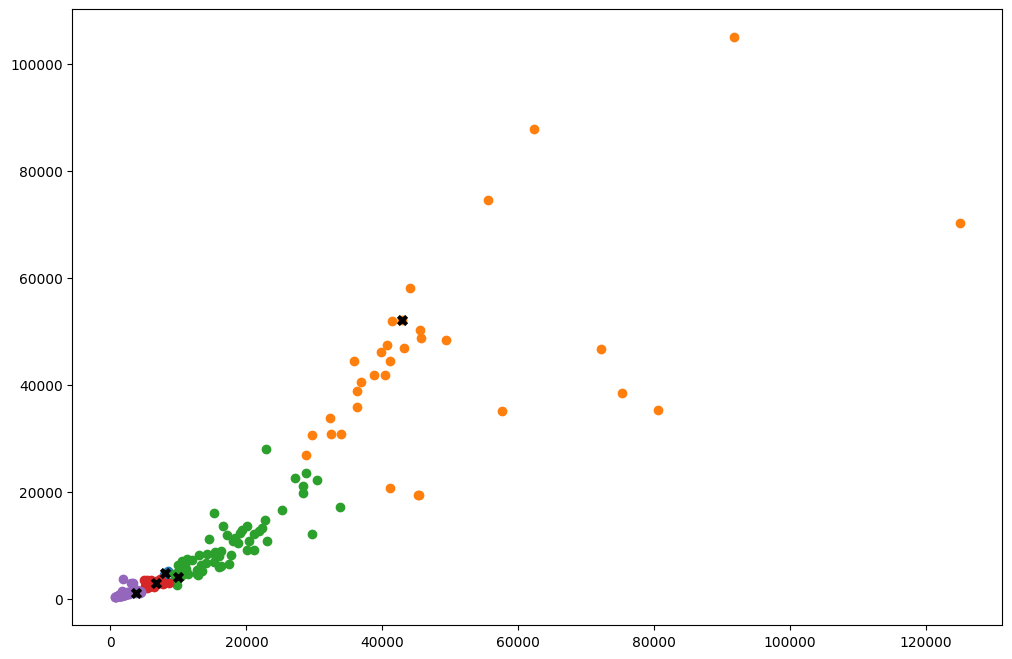

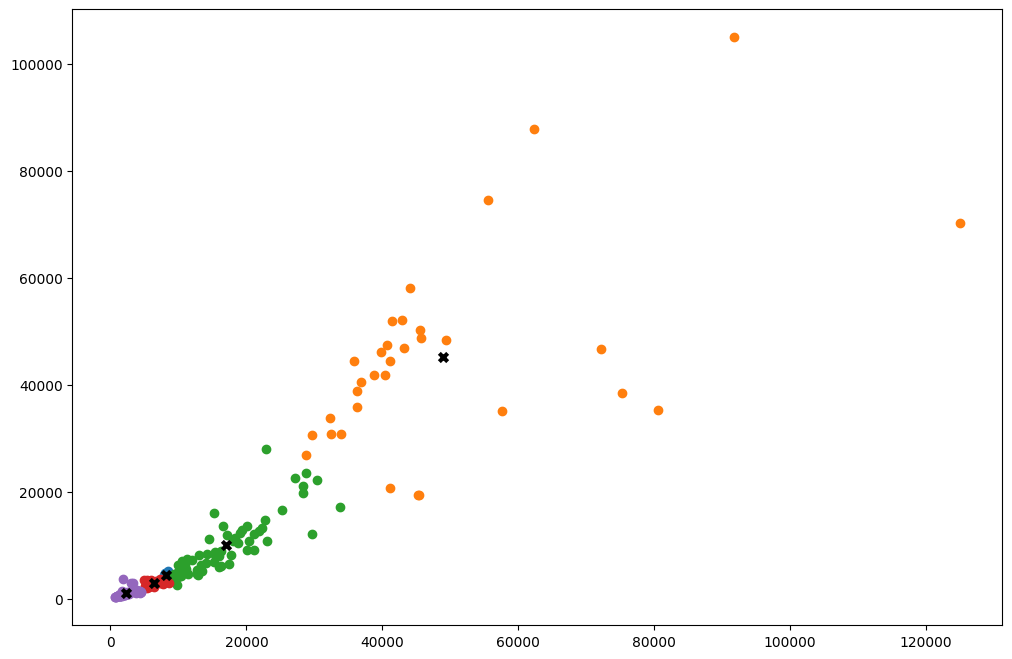

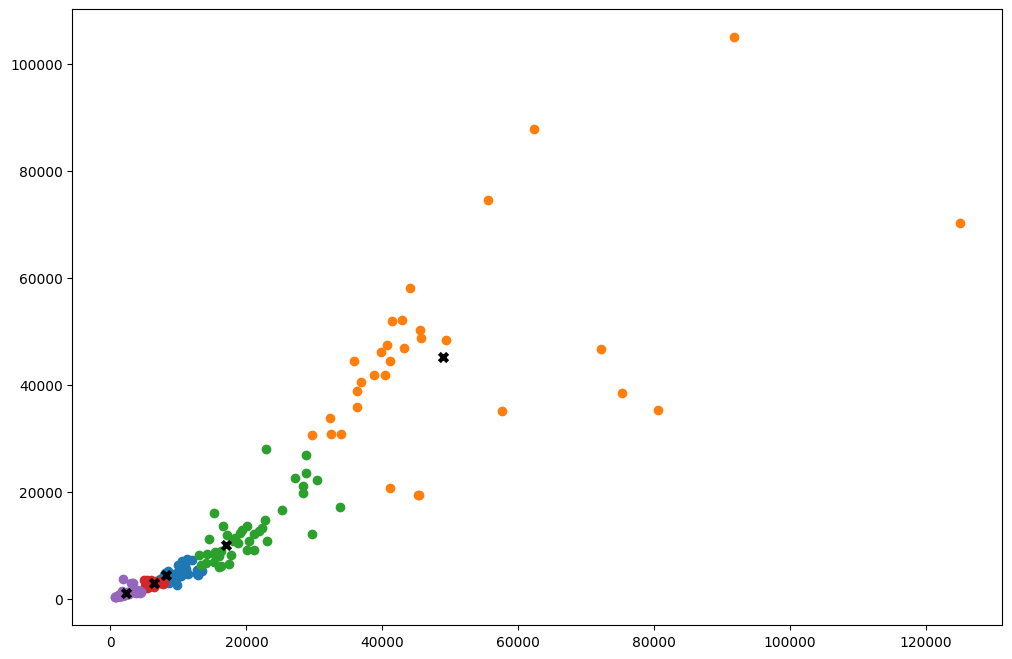

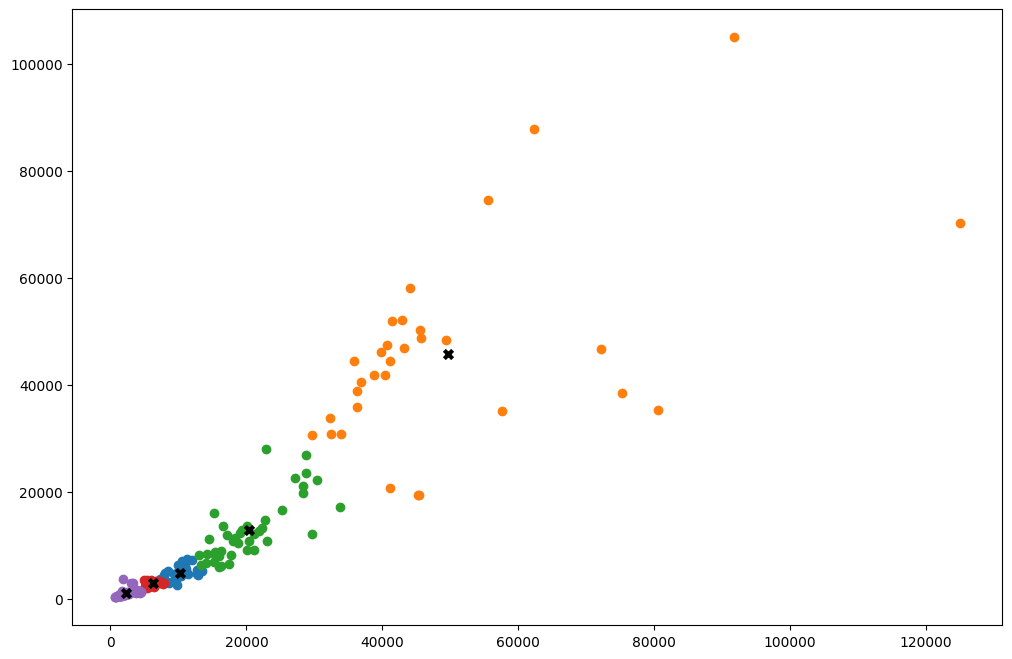

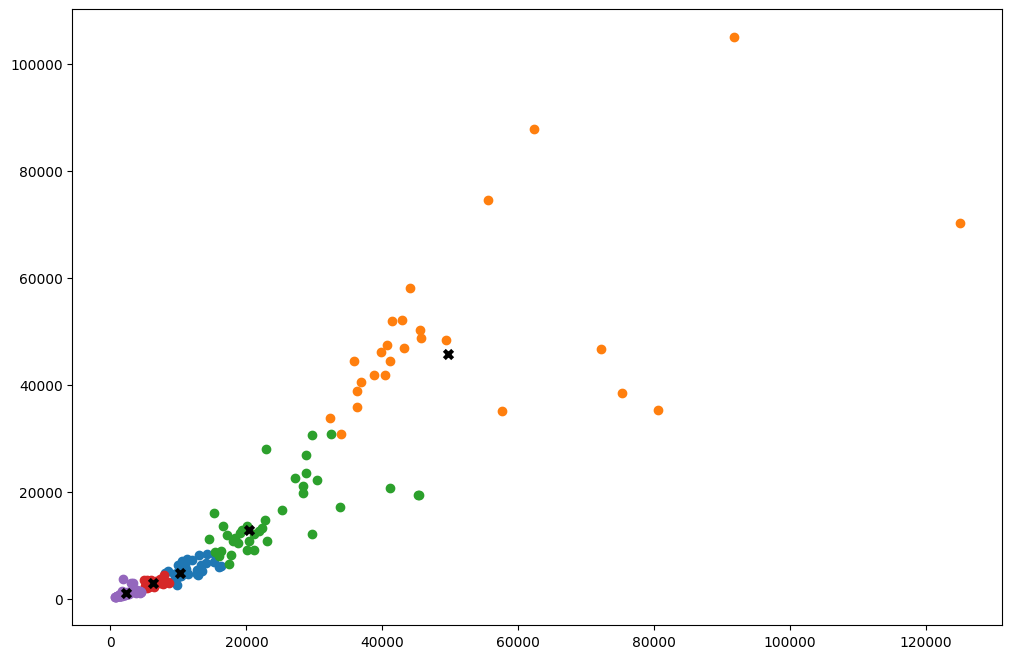

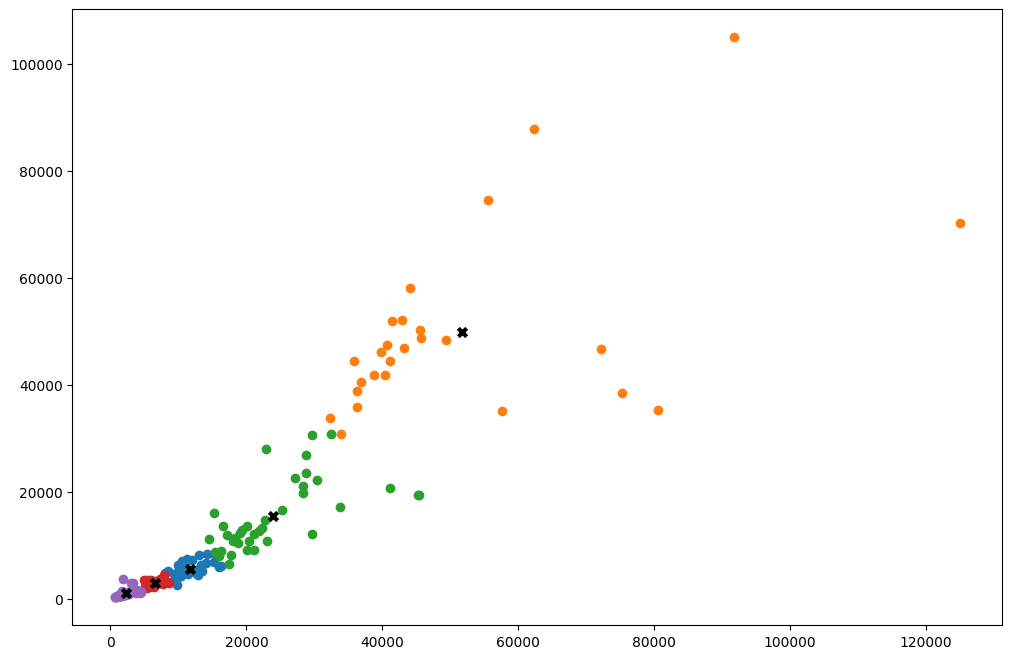

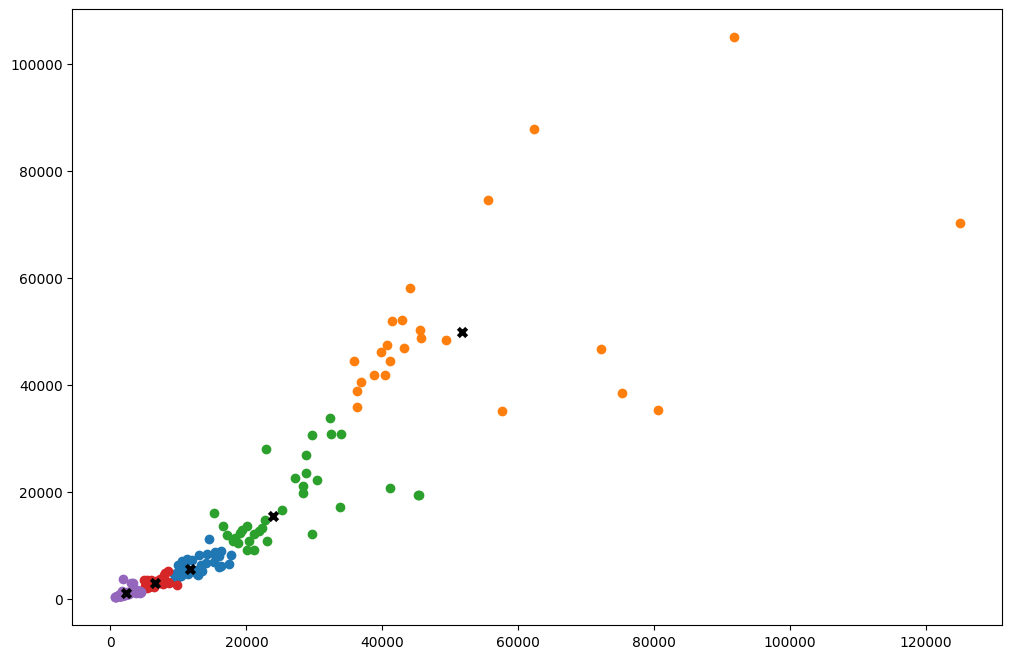

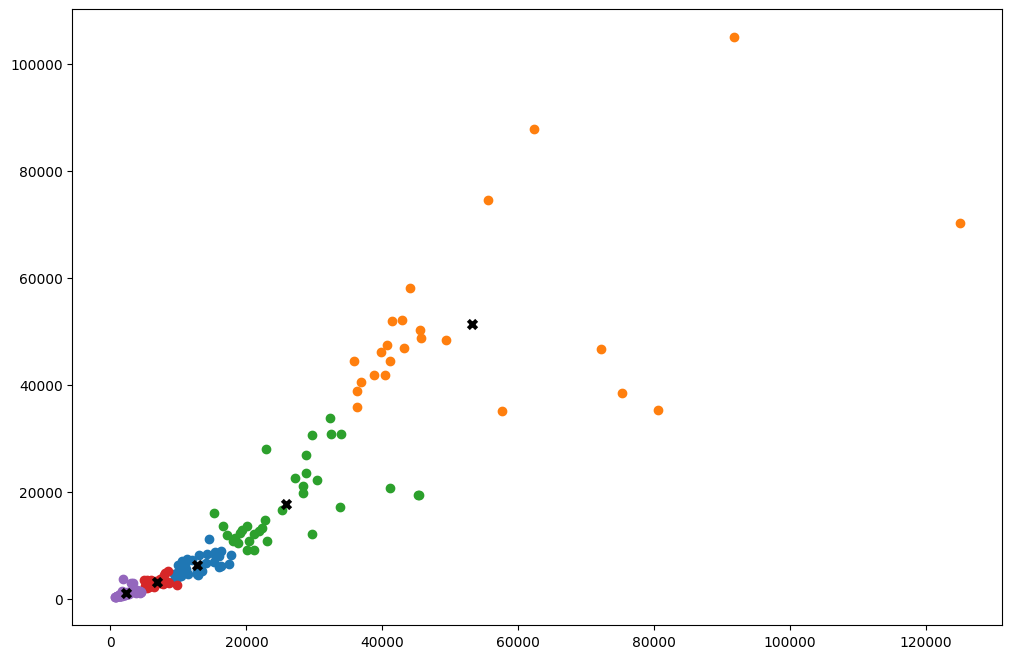

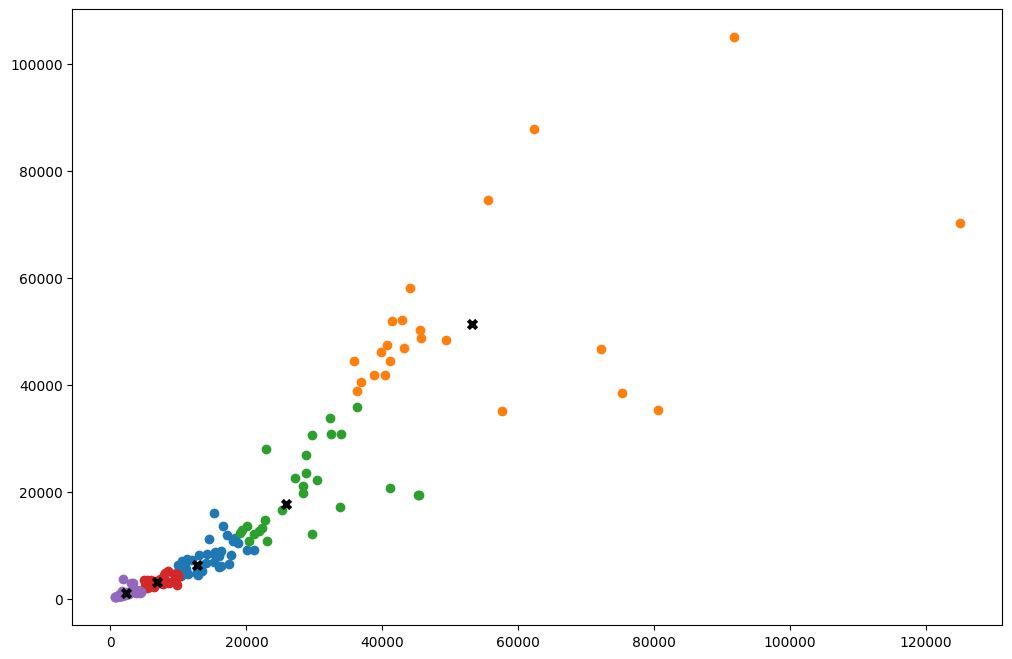

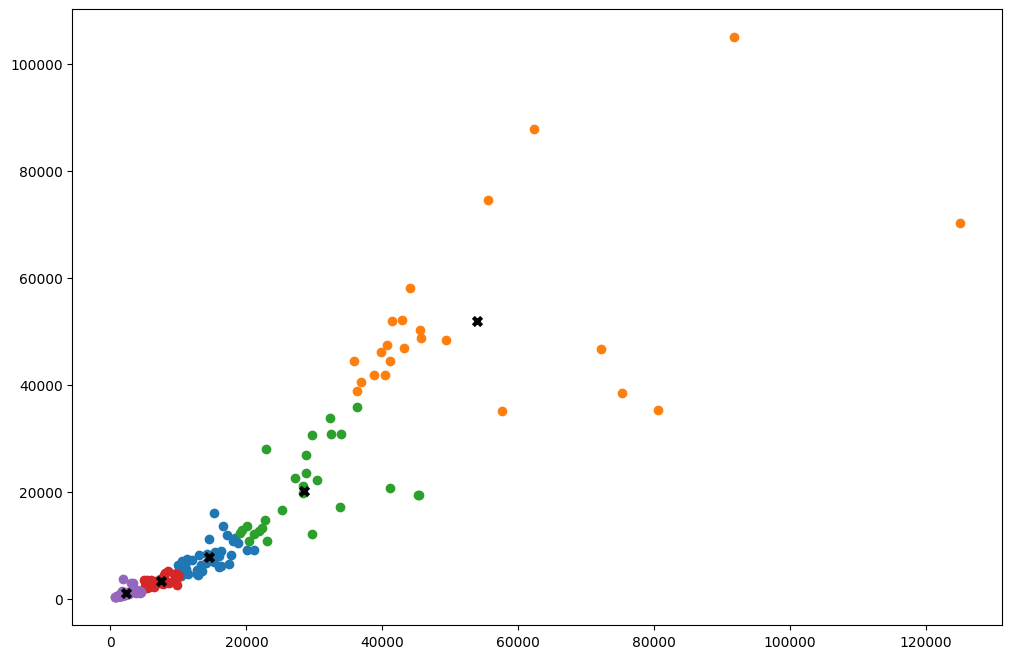

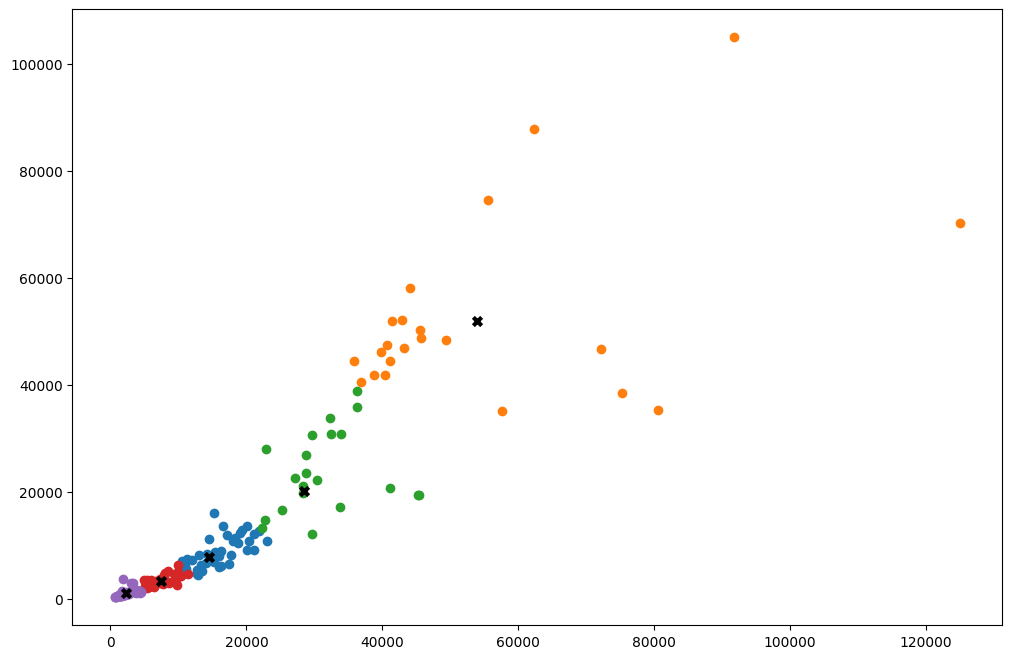

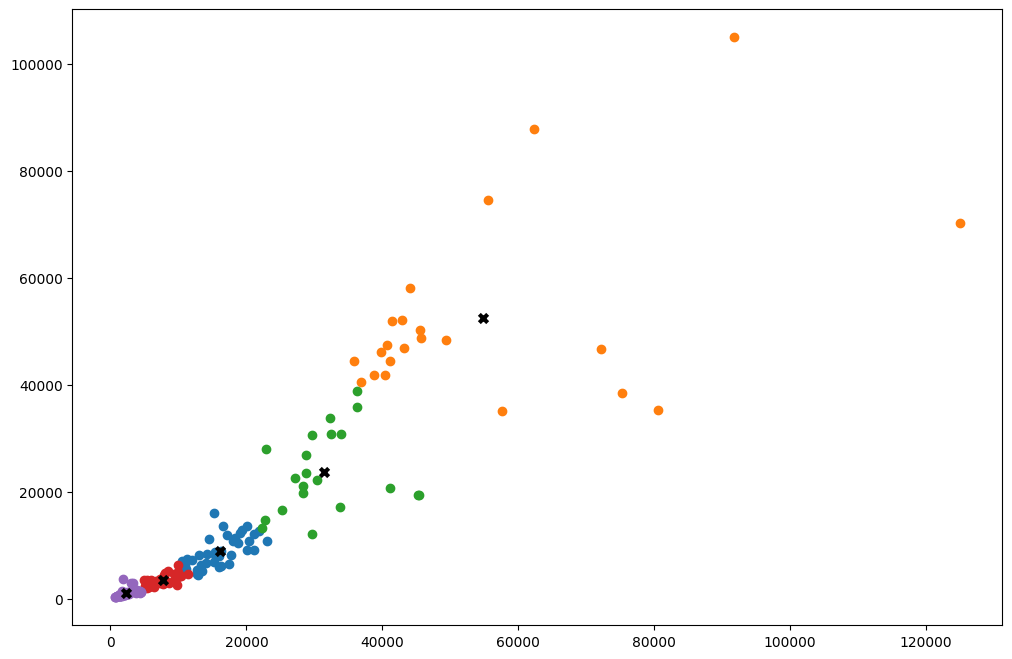

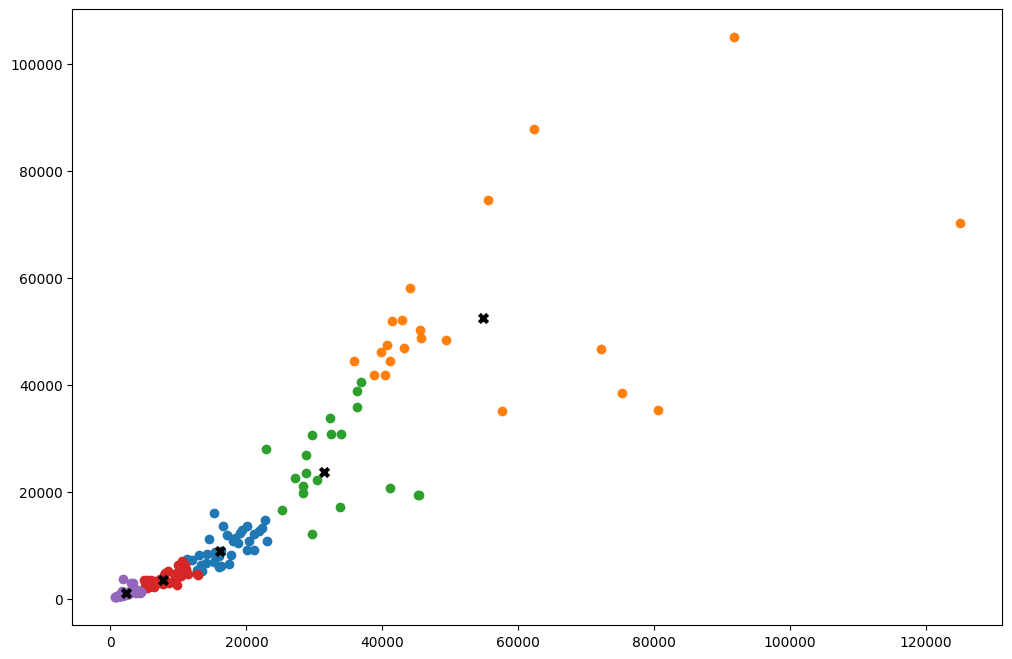

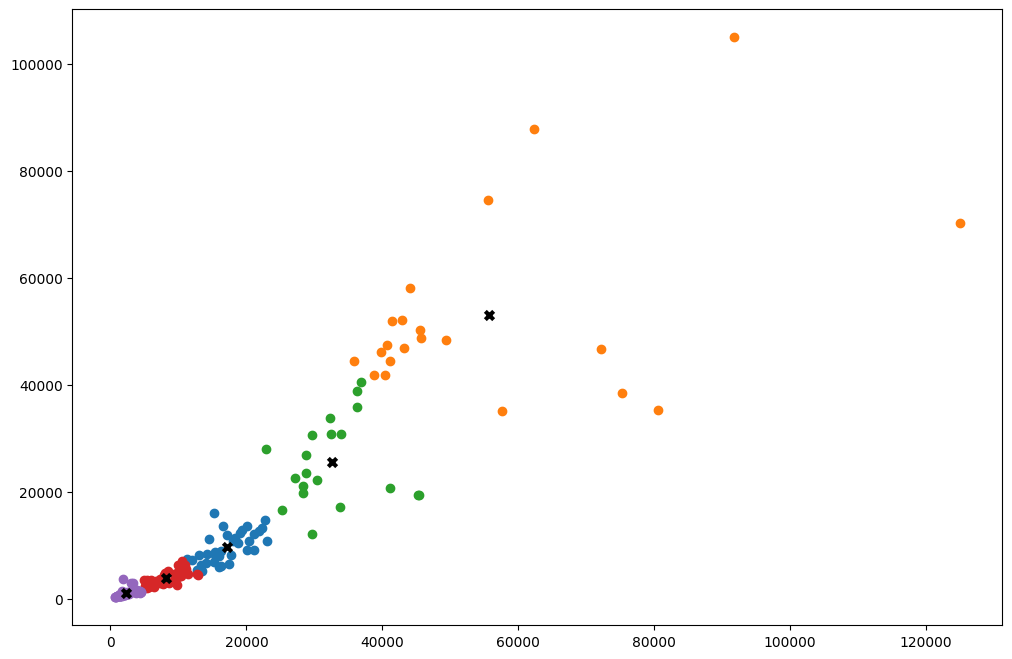

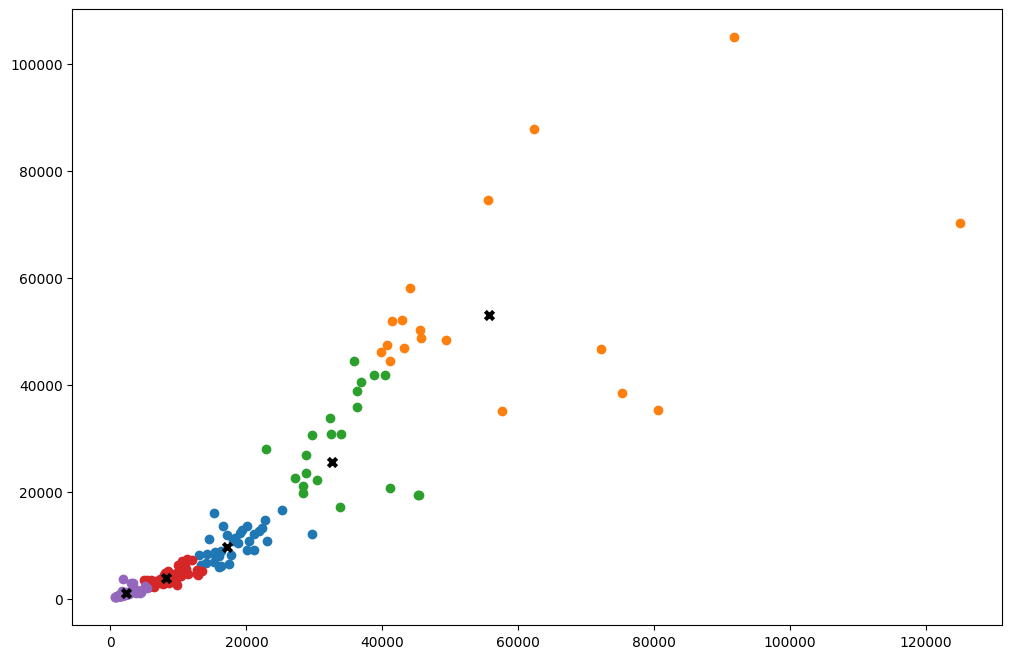

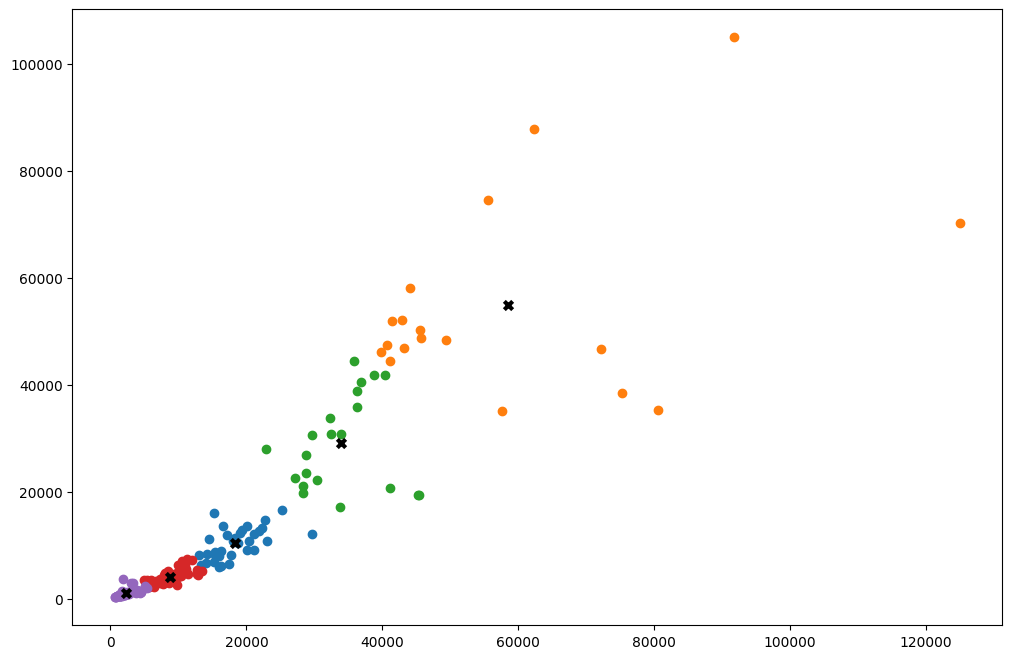

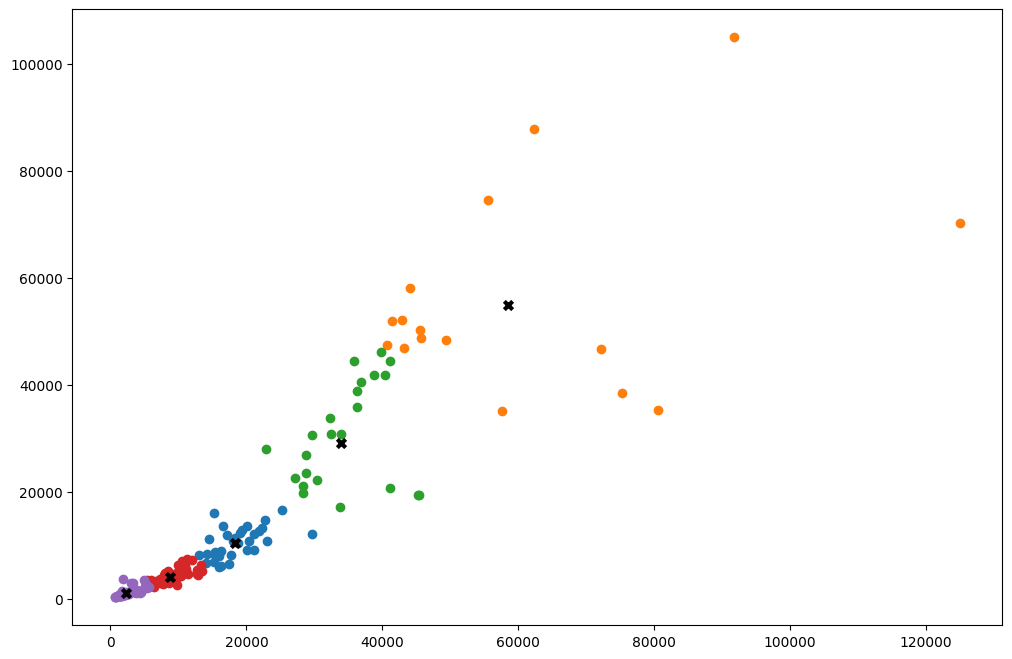

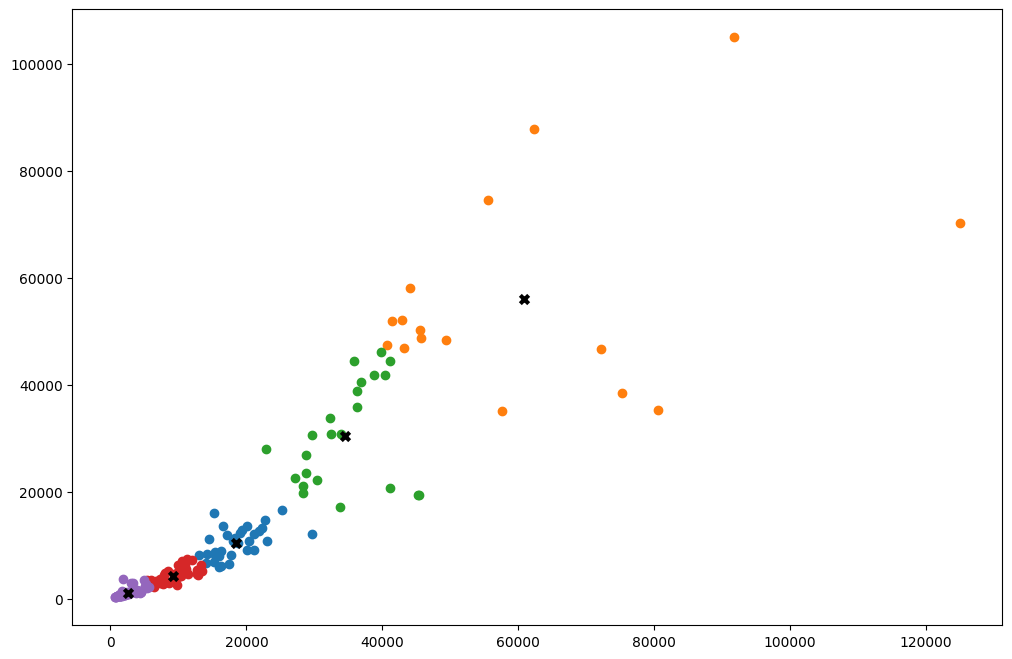

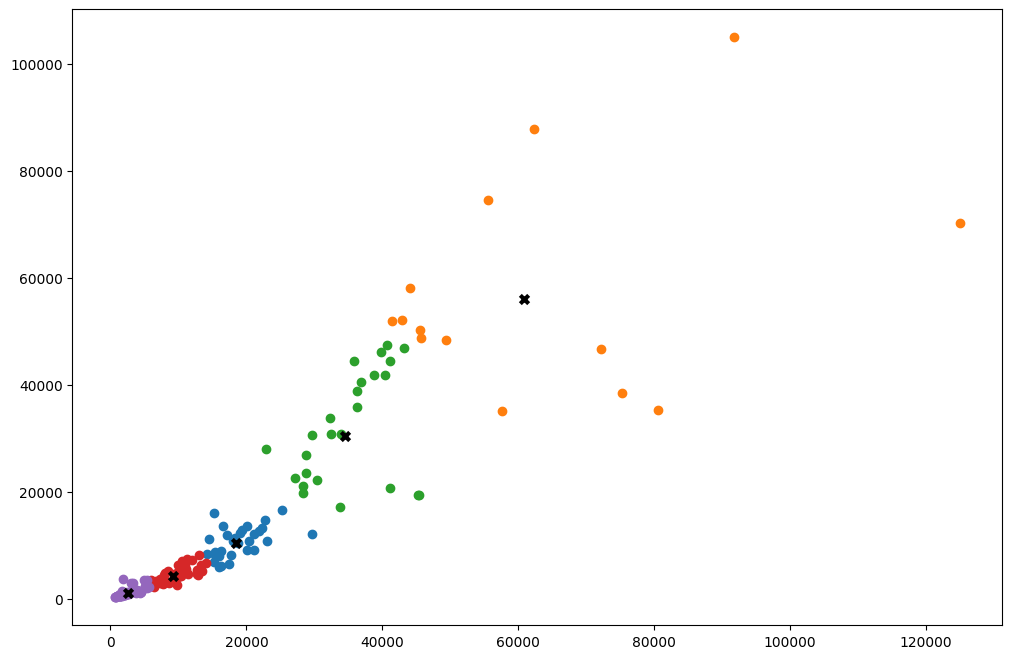

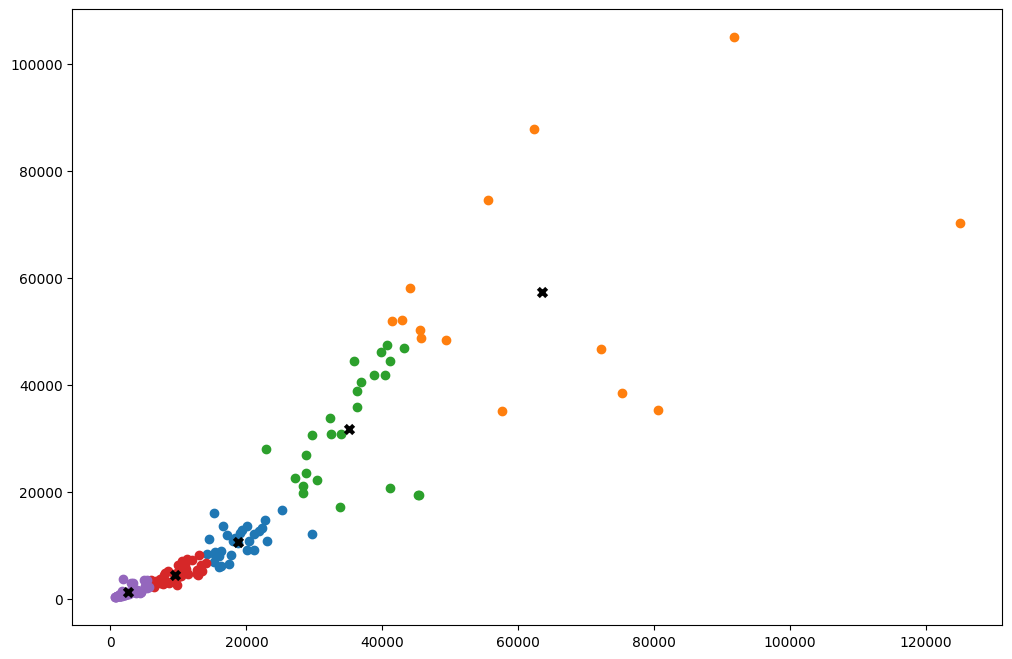

array([4., 3., 3., 3., 0., 0., 3., 1., 2., 0., 2., 2., 4., 0., 0., 2., 3.,
       4., 3., 4., 3., 3., 0., 1., 0., 4., 4., 4., 4., 2., 3., 4., 4., 0.,
       3., 3., 4., 4., 4., 3., 4., 0., 2., 2., 1., 3., 3., 3., 3., 2., 4.,
       0., 3., 2., 2., 0., 4., 3., 2., 4., 2., 3., 3., 4., 4., 3., 4., 0.,
       2., 4., 3., 0., 3., 1., 2., 2., 3., 2., 3., 0., 4., 4., 1., 4., 4.,
       0., 0., 4., 4., 0., 0., 1., 3., 4., 4., 0., 3., 4., 2., 4., 0., 4.,
       4., 3., 3., 3., 4., 4., 3., 4., 1., 2., 4., 4., 1., 2., 4., 0., 3.,
       3., 4., 0., 2., 1., 0., 0., 4., 4., 2., 4., 3., 0., 4., 1., 0., 2.,
       4., 3., 2., 2., 3., 3., 4., 0., 1., 1., 4., 4., 3., 4., 4., 4., 3.,
       0., 3., 4., 3., 1., 2., 1., 0., 4., 4., 0., 4., 4., 4.])

In [10]:
dataPlot = data[['income', 'gdpp']]
model = KMeans(5, 10, True)
model.predict(dataPlot.values)

##### Model Scikit-Learn

In [11]:
from sklearn.cluster import KMeans as SKMeans
model = SKMeans(5)
model.fit(data.values)
model.predict(data.values)

array([0, 0, 0, 0, 3, 3, 0, 2, 2, 3, 3, 2, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0,
       3, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       2, 0, 0, 0, 0, 3, 0, 3, 0, 2, 2, 3, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 2, 0, 0, 3, 0, 2, 2, 2, 0, 2, 0, 3, 0, 0, 2, 0, 0, 3, 3, 0,
       0, 3, 3, 1, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 3, 0, 0, 0, 3, 3, 4, 3, 3, 0, 0, 2, 0, 0, 3,
       0, 2, 3, 3, 0, 0, 3, 2, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 2, 2, 2, 3, 0, 0, 3, 0, 0, 0], dtype=int32)

### 2. DBSCAN
##### Model from Scratch

In [35]:
from unsupervised_learning.DBScan import DBScan
model = DBScan(eps=2000, minSamples=2)
model.fit(data.values)
model.predict(data.values)

array([ 0,  0,  0,  0,  1,  1,  0,  2, -1,  0, -1, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  3,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  1,  4,  5, -1,  0,  0,  0,  0, -1,  0,
        1,  0,  3,  6,  0,  0,  0,  7,  0, -1,  0,  0,  0,  0,  0,  0,  1,
        7,  0,  0,  0,  0,  8, -1, -1,  0, -1,  0,  1,  0,  0, -1,  0,  0,
        1,  0,  0,  0, -1,  1, -1,  0,  0,  0,  1,  0,  0,  5,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  8, -1,  0,  0, -1,  9,  0,  0,  0,
        0,  0,  1,  5, -1,  0, -1,  0,  0,  9,  0,  0,  1,  0, -1, -1,  5,
        0,  0, -1,  4,  0,  0,  0,  0,  2, -1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0, -1,  6, -1,  1,  0,  0,  1,  0,  0,  0])

##### Model Scikit-Learn

In [37]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=2000, min_samples=2)
model.fit(data.values)

labels = model.labels_
print("Cluster labels:", labels)

Cluster labels: [ 0  0  0  0  1  1  0  2 -1  0 -1 -1  0 -1  0 -1  0  0  0  0  0  0 -1 -1
  0  0  0  0  0  3  0  0  0  1  0  0  0  0  0  0  0  1  4  5 -1  0  0  0
  0 -1  0  1  0  3  6  0  0  0  7  0 -1  0  0  0  0  0  0  1  7  0  0  0
  0  8 -1 -1  0 -1  0  1  0  0 -1  0  0  1  0  0  0 -1  1 -1  0  0  0  1
  0  0  5  0  0  0  0  0  0  0  0  0  0  0  8 -1  0  0 -1  9  0  0  0  0
  0  1  5 -1  0 -1  0  0  9  0  0  1  0 -1 -1  5  0  0 -1  4  0  0  0  0
  2 -1  0  0  0  0  0  0  0  1  0  0  0 -1  6 -1  1  0  0  1  0  0  0]


### 3. Principal Component Analysis (PCA)
##### Model from Scratch

In [14]:
from unsupervised_learning.PCA import PCA
model = PCA(n_Multiplier=0.6)
dataForTransform = data.copy()
model.fit(dataForTransform.values)
dataForTransform = model.transform(dataForTransform.values)

print(f"Shape of X : {data.shape}")
print(f"Shape of X transformed : {dataForTransform.shape}")

Shape of X : (167, 9)
Shape of X transformed : (167, 5)


##### Model Scikit-Learn

In [15]:
from sklearn.decomposition import PCA
model = PCA(n_components=6)
dataForTransform = data.copy()
dataForTransform = model.fit_transform(dataForTransform)

print(f"Shape of X : {data.shape}")
print(f"Shape of X transformed : {dataForTransform.shape}")

Shape of X : (167, 9)
Shape of X transformed : (167, 6)
